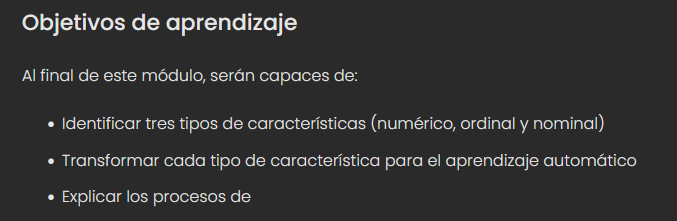

# Las caracteristicas numericas son numeros enteros o flotantes que representan una cantidad. Tambien pueden denominarse caracteristicas cuantitativas.

si el tipo de dato aparece como objeto, puede deberse a un simbolo y debe ser corregido a formato int o float

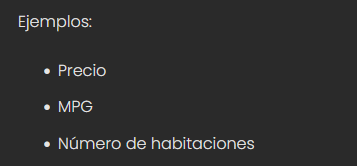

#Las caracteristicas ordinales son categorias que representan diferentes clases y que tienen un ordenamiento distinto

pueden ser cadenas o numeros si estos ultimos representan una clase ordenada.
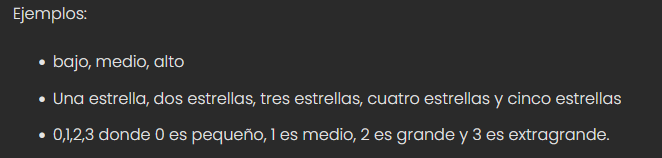

# Las caracteristicas nominales son categorias que representan diferentes clases. No estan ordenados.

pueden ser cadenas o numeros si estos ultimos representan una clase no ordenada.
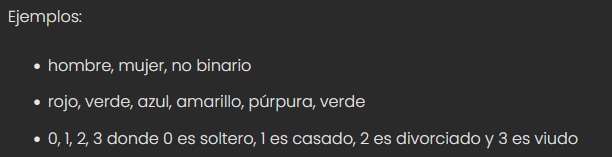

# Transformar caracteristicas para aprendizaje automatico.

para que el algoritmo de aprendizaje automatico interprete las caracteristicas, los datos deben estar en forma numerica.

##**En ocasiones, las caracteristicas que ya son numericas es necesario escalarlas para una correcta interpretacion**

## Transformar caracteristicas ordinales

Si son cadenas, habra que convertirlas en valores numericos que representen el orden de las clases.

a veces esta conversion se ha ocurrido. por ejemplo: 0 es pequenio, 1 es medio, 2 es grande, 3 es extragrande.

en este caso no es necesario ninguna transformacion.

### Ejemplos de una transformacion ordinal en cadena.
> bajo, medio, alto se transforma en 0,1,2

> una estrella, dos estrellas, tres estrellas, cuatro estrellas, cinco estrellas se transforman en 0,1,2,3,4

In [1]:
from google.colab import drive
drive.mount ("/content/drive")
import pandas as pd
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
filename = "/content/drive/MyDrive/Data CodingDojo/Tshirt.xlsx"

df = pd.read_excel(filename)
df.head()

,Size,Color,Cost,Sold
0,S,Blue,5.00,Y
1,M,Red,7.49,Y
2,M,Green,8.00,N
3,XL,Green,4.00,N
4,L,Red,9.99,Y


In [3]:
#Asignar objetivo y, y las caracteristicas X
y = df["Sold"]
X = df.drop(columns="Sold")
# Preparar train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Reemplazar caracteristica ordinal (tamanio) con numeros

Este ejemplo muestra como pueden crear un diccionario y utilizar .replace para hacer los cambios.

tengan en cuenta que estamos adquiriendo el habito de mantener nuestro conjunto de pruebas por separado, pero aplicaremos el mismo preprocesamiento a nuestro conjunto de prueba cuando estemos listos para evaluar nuestro modelo.

In [4]:
# asignen el objetivo y, y las características X
sizes = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
# definan diccionario para reemplazar
X_train['Size'] = X_train['Size'].replace(sizes)
# apliquen el diccionario a la columna en el conjunto de entrenamiento
X_test['Size'] = X_test['Size'].replace(sizes)
#observen el DataFrame para asegurarnos que funciona
X_train.head()



,Size,Color,Cost
0,0,Blue,5.00
8,0,Green,9.00
2,1,Green,8.00
4,2,Red,9.99
3,3,Green,4.00


# Transofrmar caracteristicas nominales

hay que tener cuidado cuando las categorias no estan ordenadas. No basta con asignar cada clase a un numero, como puede hacerse con las caracteristicas ordinales.

esto se debe a que los modelos de aprendizaje automatico interpretaran numeros mas altos como si tuvieran un valor mas alto que los numeros mas bajos.

Sin embargo no deberia haber un valor alto o bajo asociado con variables nominales.

por ejemplo, si reemplazaron los valores rojo,verde y azul con 0,1,2. el modelo de aprendizaje interpretara que el color azul es mayor al rojo y al verde.

sabemos que este no deberia ser el caso. Todos los colores deberian tratarse como valores iguales.

para esto, podemos codificar nuestras categorias de una sola vez, lo que hace esto es crear una columna binaria para cada clase en la columna.

Considerar que la columna "color" en nuestro conjunto de datos es un ejemplo de una caracteristica nominal.


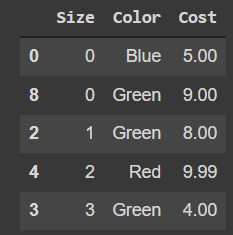

una codificacion en calido creara una columna binaria para cada color de nuestro conjunto de datos.
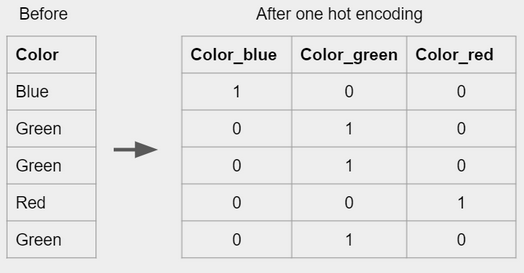


En cada una de las filas, uno ( y solo uno) de los colores es calido (asignado 1).
 Principalmente, esto es un monton de columnas que representan si los valores en esa fila son ese color o no.


 ## por ejemplo.

 la primera fila representa el color azul. Entonces, tiene un "1" en la columna "Color_blue" (que significa la presencia del color azul) y un "0" en la columna "Color_green" y 0 en la columna "Color_red". puesto que no es verde ni rojo.